# Logistic Regression Unit
- Forms neuron in NN
- Find optimal W,b
- Y = WTX + b

In [26]:
import numpy as np
import pandas as pd
import math
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1/(1+np.exp(-x))
class Perceptron:
    """
    Single Layer Perceptron
        - Parameters W and b
        - Multiple Activation functions
        - Gradient Descent capabilities (require step size selection)
    """
    def __init__(self, params: int, function: str) -> None: # Add reshaping inputs from ndArrays to 1d
        self.W = np.ones(params) # Initial setting of W by number of parameters
        self.b = np.ones(1)
        self.error = None # Error parameter to check if problem with initialisation
        activations = {
            "sigmoid": sigmoid,
            "relu": lambda x: max(0, x),
            "tanh": lambda x: math.tanh(x)
        }
        derivatives = {
            "sigmoid": lambda x: sigmoid(x)*(1-sigmoid(x)),
            "relu": lambda x: int(x>0),
            "tanh": lambda x: 1 - np.tanh(x)*np.tanh(x)
        }
        if function not in activations or function not in derivatives:
            self.error = "Invalid Activation Function"
        self.activation = activations.get(function)
        self.derivative = derivatives.get(function)

    def predict(self, x: np.array):
        return (self._forward(x))

    def train(self, df: pd.DataFrame, gt: str, batch_size = 256, lr = 10) -> None:
        # Default to stochastic gradient descent
        N = df.shape[0]

        for i in range(0, N, batch_size):
            y = df[gt].values
            x = df.drop(columns=[gt]).values
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            pred = self._forward(x_batch) # Forward pass

            dLoss = 2*(y_batch - pred) # Derivative of loss
            dAct = pred*(1-pred) # Derivative of wTX+b
            deriv = dLoss*dAct # Chain Rule
            
            # Gradient Descent
            db = deriv.mean()
            dW = np.dot(x_batch.T, deriv) / batch_size # Vector
            self._gradDescent(dW, db, lr = lr)
    def evaluate(self, df: pd.DataFrame, gt: str) -> float: # Obtain error
        y = df[gt]
        x = df.drop(columns=[gt])
        pred = self._forward(x)
        vect = (y-pred)*(y-pred)
        return vect.mean()

    def _forward(self, inputs: pd.DataFrame) -> np.ndarray: # Forward pass with given inputs
        agg = (np.dot(inputs, self.W) - self.b)
        out = self.activation(agg)
        return (out)
    
    def _gradDescent(self, dW: np.array, db: np.array, lr) -> None: # Backpropagation of W and b
        self.W -= lr * dW
        self.b -= lr * db
        # self.lr /= 2

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
perceptron = Perceptron(5, "sigmoid")
def output(a,b,c,d,e):
    return a + 6*b - 9*c + 2*e - 6

N = 9_999_999
X = np.random.uniform(-10, 10, (N, 5))
y = (output(X[:,0], X[:,1], X[:,2], X[:, 3], X[:,4]) > 0).astype(np.float32)

df = pd.DataFrame(X, columns = ["x1", "x2", "x3", "x4", "x5"])
df['y'] = y
epochs = 20
training = df[0:9999000]
testing = df[9999000:]
train_error = []
test_error = []
for epoch in range(epochs):
    perceptron.train(df, "y", batch_size = 999999, lr = 100)
    train_error.append(perceptron.evaluate(training, "y"))
    test_error.append(perceptron.evaluate(testing, "y"))

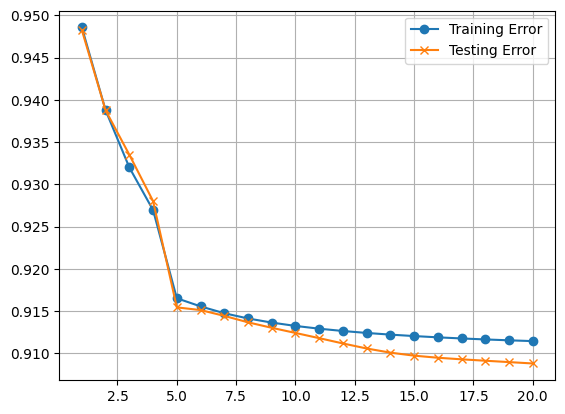

In [28]:
x = np.linspace(1, epochs, num = 20, dtype = int)
train_error = np.array(train_error)
test_error = np.array(test_error)
plt.plot(x, train_error, label = "Training Error", marker = "o")
plt.plot(x, test_error, label = "Testing Error", marker = "x")
plt.legend()
plt.grid(True)
plt.show()